### Implememtation

In [16]:
import itertools

# Define the list of representatives
representatives = ['K', 'L', 'M', 'N', 'O', 'P']

# Define the conditions for validation

# 1. P sits immediately next to N
def condition_1(arrangement):
    return abs(arrangement.index('P') - arrangement.index('N')) == 1 or \
           abs(arrangement.index('P') - arrangement.index('N')) == len(arrangement) - 1

# 2. L sits immediately next to M, N, or both
def condition_2(arrangement):
    return (abs(arrangement.index('L') - arrangement.index('M')) == 1 or
            abs(arrangement.index('L') - arrangement.index('N')) == 1)

# 3. K does not sit immediately next to M
def condition_3(arrangement):
    pos_K = arrangement.index('K')
    pos_M = arrangement.index('M')
    # Check if K and M are next to each other in a circular manner
    return abs(pos_K - pos_M) != 1 and abs(pos_K - pos_M) != len(arrangement) - 1

# 4. If O sits immediately next to P, O does not sit immediately next to M
def condition_4(arrangement):
    pos_O = arrangement.index('O')
    pos_P = arrangement.index('P')
    pos_M = arrangement.index('M')
    # Check if O and P are next to each other
    if abs(pos_O - pos_P) == 1 or abs(pos_O - pos_P) == len(arrangement) - 1:
        # If O and P are next to each other, O should not be next to M
        if abs(pos_O - pos_M) == 1 or abs(pos_O - pos_M) == len(arrangement) - 1:
            return False
    return True

# Helper function to normalize circular permutations
def normalize(arrangement):
    """Returns the lexicographically smallest rotation of the arrangement."""
    rotations = [arrangement[i:] + arrangement[:i] for i in range(len(arrangement))]
    return min(rotations)

# Generate all permutations of the seating arrangement
all_arrangements = itertools.permutations(representatives)

# Set to store unique valid arrangements (ignoring rotations)
unique_valid_arrangements = set()

# Iterate through all possible seating arrangements and check validity
for arrangement in all_arrangements:
    if (condition_1(arrangement) and condition_2(arrangement) and
        condition_3(arrangement) and condition_4(arrangement)):
        # Normalize and add to the set of unique valid arrangements
        normalized_arrangement = normalize(arrangement)
        unique_valid_arrangements.add(normalized_arrangement)

# Display unique valid seating arrangements
if unique_valid_arrangements:
    print("Valid seating arrangements found:", len(unique_valid_arrangements))
    for valid in sorted(unique_valid_arrangements):
        print(valid)
else:
    print("No valid seating arrangements found.")

Valid seating arrangements found: 16
('K', 'L', 'M', 'N', 'P', 'O')
('K', 'L', 'M', 'O', 'N', 'P')
('K', 'L', 'M', 'P', 'N', 'O')
('K', 'L', 'N', 'P', 'M', 'O')
('K', 'N', 'P', 'L', 'M', 'O')
('K', 'N', 'P', 'M', 'L', 'O')
('K', 'O', 'L', 'M', 'N', 'P')
('K', 'O', 'L', 'M', 'P', 'N')
('K', 'O', 'M', 'L', 'N', 'P')
('K', 'O', 'M', 'L', 'P', 'N')
('K', 'O', 'M', 'P', 'N', 'L')
('K', 'O', 'N', 'P', 'M', 'L')
('K', 'O', 'P', 'N', 'M', 'L')
('K', 'P', 'N', 'L', 'M', 'O')
('K', 'P', 'N', 'M', 'L', 'O')
('K', 'P', 'N', 'O', 'M', 'L')


### Layout

('K', 'O', 'M', 'P', 'N', 'L')


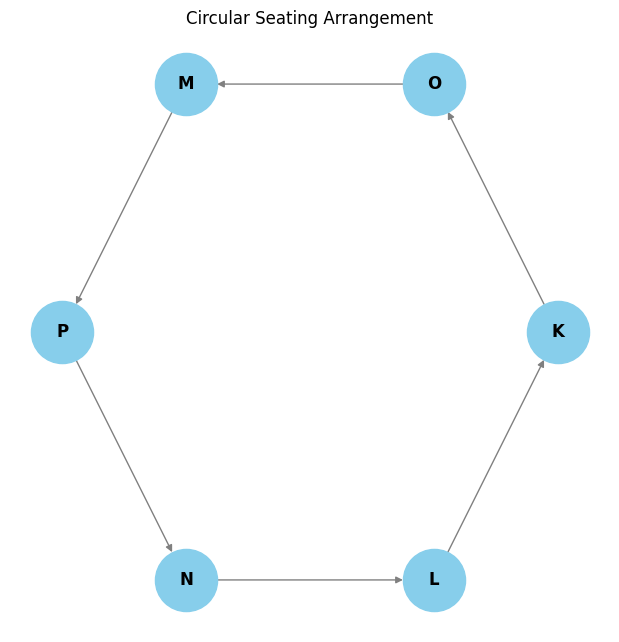

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the first valid seating arrangement (replace with any valid arrangement)
first_arrangement = list(unique_valid_arrangements)[0]

print(first_arrangement)

# Create a circular graph layout with NetworkX
G = nx.DiGraph()

# Add nodes and edges for circular arrangement
for i in range(len(first_arrangement)):
    G.add_node(first_arrangement[i])
    G.add_edge(first_arrangement[i], first_arrangement[(i + 1) % len(first_arrangement)])

# Plotting the circular seating arrangement
plt.figure(figsize=(6, 6))
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')

plt.title('Circular Seating Arrangement')
plt.show()


### Valid Arrangements

##### Which one of the following seating arrangements of the six representatives in chairs 1 through 6 would NOT violate the stated conditions?
K, P, N, M, O, L

K, L, M, P, N, O

K, L, M, O, P, N

K, O, P, N, L, M

K, N, L, O, M, P

In [18]:
# Check if a given arrangement is valid based on the unique_valid_arrangements set
def is_valid_arrangement(arrangement, valid_set):
    # Normalize the arrangement to its lexicographically smallest rotation
    normalized_arrangement = normalize(arrangement)
    # Check if the normalized arrangement is in the set of valid arrangements
    return normalized_arrangement in valid_set

# Define the list of sample arrangements to check
sample_arrangements = [
    ('K', 'P', 'N', 'M', 'O', 'L'),
    ('K', 'L', 'M', 'P', 'N', 'O'),
    ('K', 'L', 'M', 'O', 'P', 'N'),
    ('K', 'O', 'P', 'N', 'L', 'M'),
    ('K', 'N', 'L', 'O', 'M', 'P')
]

# Check each arrangement and print the result
for arrangement in sample_arrangements:
    if is_valid_arrangement(arrangement, unique_valid_arrangements):
        print(f"The arrangement {arrangement} is valid.")
    else:
        print(f"The arrangement {arrangement} is NOT valid.")

The arrangement ('K', 'P', 'N', 'M', 'O', 'L') is NOT valid.
The arrangement ('K', 'L', 'M', 'P', 'N', 'O') is valid.
The arrangement ('K', 'L', 'M', 'O', 'P', 'N') is NOT valid.
The arrangement ('K', 'O', 'P', 'N', 'L', 'M') is NOT valid.
The arrangement ('K', 'N', 'L', 'O', 'M', 'P') is NOT valid.


In [31]:
# Function to return a dictionary mapping chair positions to representatives
def seating_positions_from_arrangement(arrangement):
    """Returns a dictionary mapping chair positions (1 to 6) to representatives."""
    return {i + 1: person for i, person in enumerate(arrangement)}

# Function to find who sits to the left of someone
def who_sits_on_left(seating_positions, person):
    # Get the position of the person
    pos = [key for key, value in seating_positions.items() if value == person][0]
    # Correctly calculate the left (counter-clockwise) position
    left_pos = pos - 1 if pos - 1 > 0 else 6  # Wrap around to 6 if it's position 1
    return seating_positions[left_pos]

# Function to find who sits to the right of someone
def who_sits_on_right(seating_positions, person):
    # Get the position of the person
    pos = [key for key, value in seating_positions.items() if value == person][0]
    # Correctly calculate the right (clockwise) position
    right_pos = pos + 1 if pos + 1 <= 6 else 1  # Wrap around to 1 if it's position 6
    return seating_positions[right_pos]

# Function to find who sits between two people
def who_sits_between(seating_positions, person1, person2):
    # Find their positions
    pos1 = [key for key, value in seating_positions.items() if value == person1][0]
    pos2 = [key for key, value in seating_positions.items() if value == person2][0]
    
    # Correctly handle the circular seating arrangement
    # Positions of person1 and person2 in clockwise order
    clockwise_pos1 = (pos1 - 1) % 6 + 1
    clockwise_pos2 = (pos2 - 1) % 6 + 1
    
    # Find the person who sits between person1 and person2
    if abs(clockwise_pos1 - clockwise_pos2) == 2:  # If adjacent chairs are 1 and 2 apart
        between_pos = (clockwise_pos1 + 1) % 6  # Between position in clockwise direction
        if between_pos == 0:
            between_pos = 6
        return seating_positions[between_pos]
    return None

# Function to query neighbors of a specific person in a given seating arrangement
def query_neighbors(seating_position, person):
    """Query the neighbors of a person in the given seating arrangement."""
    print(f"Querying neighbors of {person}:")
    seating_positions = seating_positions_from_arrangement(seating_position)
    left_person = who_sits_on_left(seating_positions, person)
    right_person = who_sits_on_right(seating_positions, person)
    print(f"In arrangement {seating_position}:")
    print(f"{person} sits with {left_person} on the left and {right_person} on the right.")

# Function to query who sits between two specific people in a given arrangement
def query_between(seating_position, person1, person2):
    """Query who sits between two people in the given seating arrangement."""
    print(f"Querying who sits between {person1} and {person2}:")
    seating_positions = seating_positions_from_arrangement(seating_position)
    person_between = who_sits_between(seating_positions, person1, person2)
    if person_between:
        print(f"In arrangement {seating_position}: {person_between} sits between {person1} and {person2}.")
    else:
        print(f"In arrangement {seating_position}: No one sits between {person1} and {person2}.")

In [32]:
seating_arrangement = ('K', 'L', 'M', 'P', 'N', 'O')

In [33]:
# Example: Convert a seating arrangement into a dictionary
seating_positions = seating_positions_from_arrangement(seating_arrangement)
print(seating_positions)

{1: 'K', 2: 'L', 3: 'M', 4: 'P', 5: 'N', 6: 'O'}


In [34]:
# Example: Query who sits to the left of 'P'
left_of_p = who_sits_on_left(seating_positions, 'P')
print(f"Who sits to the left of P? {left_of_p}")

Who sits to the left of P? M


In [35]:
# Example: Query who sits to the right of 'M'
right_of_m = who_sits_on_right(seating_positions, 'M')
print(f"Who sits to the right of M? {right_of_m}")

Who sits to the right of M? P


In [36]:
# Example: Query who sits between 'P' and 'O'
person_between = who_sits_between(seating_positions, 'P', 'O')
print(f"Who sits between P and O? {person_between}")

Who sits between P and O? N


In [37]:
# Example: Query neighbors of 'K'
query_neighbors(seating_arrangement, 'K')

Querying neighbors of K:
In arrangement ('K', 'L', 'M', 'P', 'N', 'O'):
K sits with O on the left and L on the right.


In [38]:
# Example: Query who sits between 'N' and 'O'
query_between(seating_arrangement, 'N', 'O')

Querying who sits between N and O:
In arrangement ('K', 'L', 'M', 'P', 'N', 'O'): No one sits between N and O.
